***DSCI 100 Project proposal***

Natsumi Tadakuma, Jackie Huang, Cindy Chen, Nikko Dumrique

Importing the libraries:

In [8]:
library(tidyverse)
library(tidyr)
library(repr)
library(tidymodels)
library(ggplot2)

In [36]:
options(repr.matrix.max.rows = 6, repr.matrix.max.cols = 64)
options(repr.plot.width = 30, repr.plot.height = 10)

Importing the dataset:

In [20]:
#download the zip file into a temporary file
temp <- tempfile()
temp_dir <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip", temp, mode="wb")
OnlineNewsPopularity_unzipped <- unzip(temp, exdir = temp_dir)

#read the csv within the unzipped_contents
online_news_pop_csv <- OnlineNewsPopularity_unzipped[2] #may be unzipped_contents[1] if you get an error
online_news_pop_data <- read_csv(online_news_pop_csv)
online_news_pop_data
unlink(c(temp, temp_dir))

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7000000,-0.3500000,-0.6000000,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7000000,-0.1187500,-0.1250000,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0000000,-0.4666667,-0.8000000,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8000000,-0.3696970,-0.6000000,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0000000,-0.2201923,-0.5000000,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6000000,-0.1950000,-0.4000000,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855
http://mashable.com/2013/01/07/bodymedia-armbandgets-update/,731,8,960,0.4181626,1,0.5498339,21,20,20,⋯,0.10000000,1.0000000,-0.2244792,-0.5000000,-0.0500000,0.0000000,0.0000000,0.50000000,0.0000000,556
http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.4335736,1,0.5721078,20,20,20,⋯,0.10000000,1.0000000,-0.2427778,-0.5000000,-0.0500000,1.0000000,0.5000000,0.50000000,0.5000000,891
http://mashable.com/2013/01/07/car-of-the-future-infographic/,731,11,97,0.6701031,1,0.8367347,2,0,0,⋯,0.40000000,0.8000000,-0.1250000,-0.1250000,-0.1250000,0.1250000,0.0000000,0.37500000,0.0000000,3600


tidying the data:

In [24]:
news = online_news_pop_data %>% 
      mutate(popularity = ifelse(shares < 500, "Not_Popular",
                          ifelse(shares %in% 500:1399, "Somewhat_Popular",
                          ifelse(shares %in% 1400:3299, "Popular", "Viral")))) %>% 
      mutate(popularity = as_factor(popularity))


In [25]:
# combining the weekdays and data channels into one column
# which(colnames(news)=="data_channel_is_lifestyle")

news[,14:19][news[,14:19] == 0] = NA

news = news %>% 
    pivot_longer(data_channel_is_lifestyle:data_channel_is_world,
                 names_to = "Channel",
                 names_prefix = "data_channel_is_",
                 values_to = "Value",
                 values_drop_na = TRUE) %>% 
  select(-Value)

# which(colnames(news)=="weekday_is_monday")
news[,32:38][news[32:38] == 0] = NA
news = news %>% 
    pivot_longer(weekday_is_monday:weekday_is_sunday,
                 names_to = "weekday",
                 names_prefix = "weekday_is_",
                 values_to = "value",
                 values_drop_na = TRUE) %>% 
  select(-value)

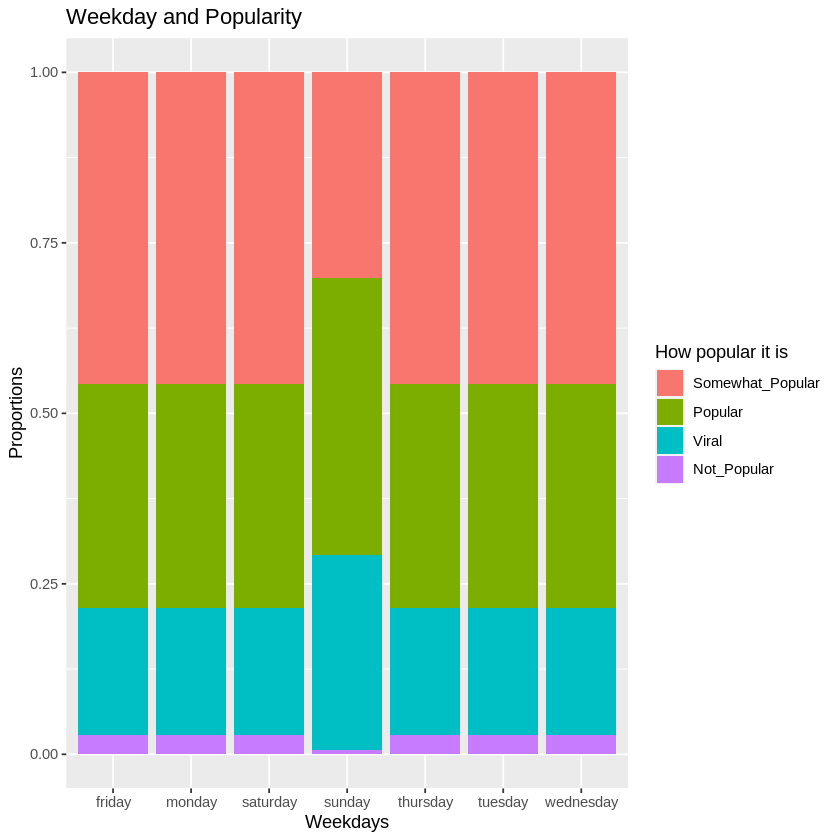

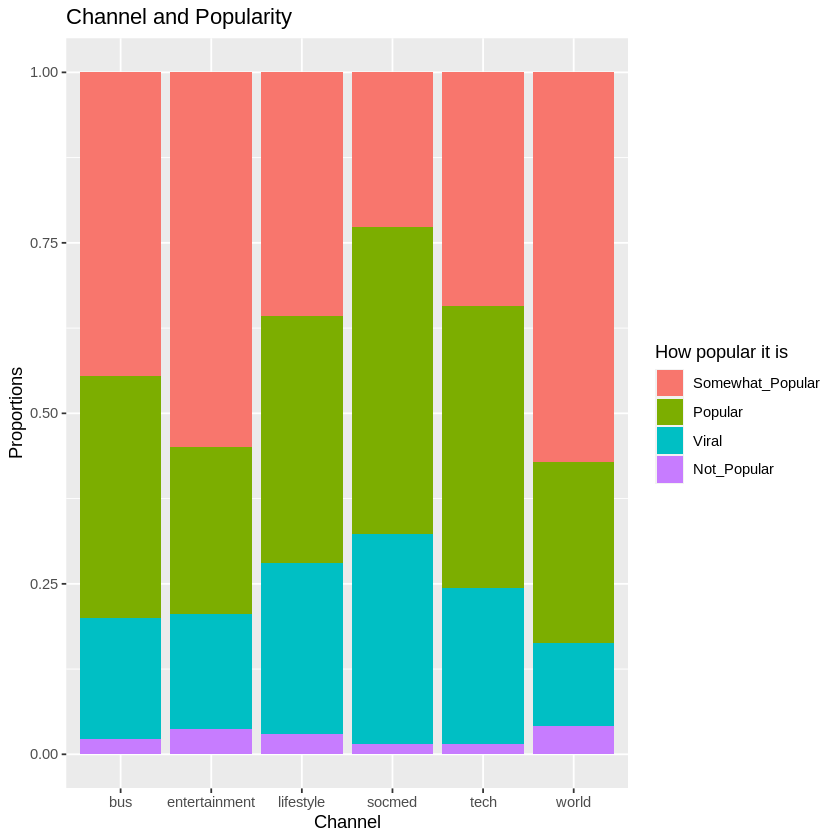

In [26]:
#plots
pltWeekdays = news %>% 
            ggplot(aes(x = weekday, fill = popularity)) +
            geom_bar(position = "fill") + 
            labs( x = "Weekdays", y = "Proportions", fill = "How popular it is", 
                  title = "Weekday and Popularity")
pltWeekdays

pltChannels = news %>% 
            ggplot(aes(x = Channel, fill = popularity)) +
            geom_bar(position = "fill") + 
            labs( x = "Channel", y = "Proportions", fill = "How popular it is", 
                  title = "Channel and Popularity")
pltChannels


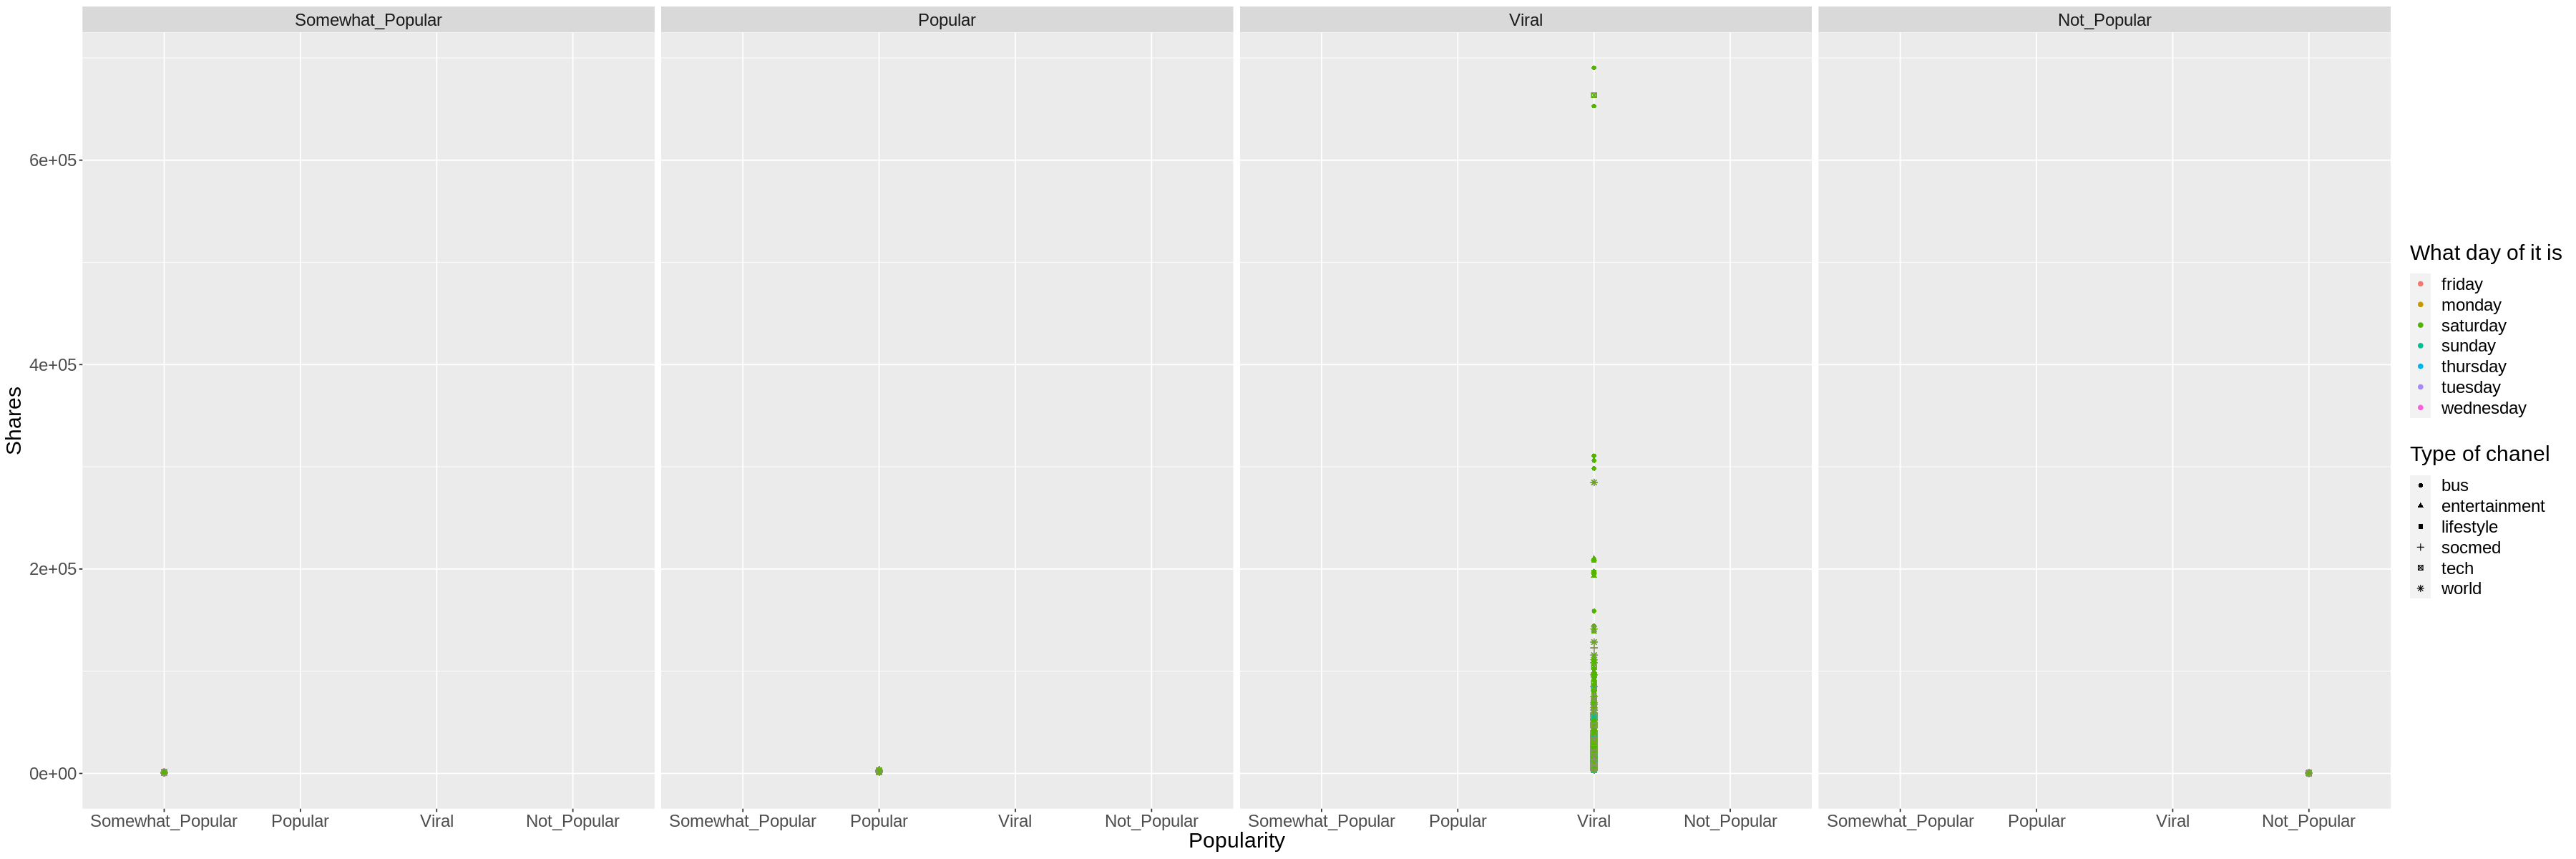

In [47]:

pltWkCh = news %>% 
#         filter(shares < 500) %>% 
        ggplot(aes(x = factor(popularity), y = shares)) +
        facet_grid(. ~popularity, scales = "free_y", space = "free_y") +
        geom_point(aes(color = weekday, shape = Channel), size = 1.5) +
        labs(x = "Popularity", y = "Shares", color = "What day of it is",
             shape = "Type of chanel") +
  theme(text = element_text(size = 18))
pltWkCh

# pltWkCh2 = news %>%
#         filter(shares < 3300) %>% 
#         ggplot(aes(x = popularity, y = shares)) +
#         geom_point(aes(color = weekday, shape = Channel), size = 1.5) +
#         labs(x = "Popularity", y = "Shares", color = "What day of it is",
#              shape = "Type of chanel")
# pltWkCh2

In [42]:
?facet_grid

facet_grid {ggplot2},R Documentation
"rows, cols","A set of variables or expressions quoted by vars() and defining faceting groups on the rows or columns dimension. The variables can be named (the names are passed to labeller). For compatibility with the classic interface, rows can also be a formula with the rows (of the tabular display) on the LHS and the columns (of the tabular display) on the RHS; the dot in the formula is used to indicate there should be no faceting on this dimension (either row or column)."
scales,"Are scales shared across all facets (the default, ""fixed""), or do they vary across rows (""free_x""), columns (""free_y""), or both rows and columns (""free"")?"
space,"If ""fixed"", the default, all panels have the same size. If ""free_y"" their height will be proportional to the length of the y scale; if ""free_x"" their width will be proportional to the length of the x scale; or if ""free"" both height and width will vary. This setting has no effect unless the appropriate scales also vary."
shrink,"If TRUE, will shrink scales to fit output of statistics, not raw data. If FALSE, will be range of raw data before statistical summary."
labeller,"A function that takes one data frame of labels and returns a list or data frame of character vectors. Each input column corresponds to one factor. Thus there will be more than one with vars(cyl, am). Each output column gets displayed as one separate line in the strip label. This function should inherit from the ""labeller"" S3 class for compatibility with labeller(). You can use different labeling functions for different kind of labels, for example use label_parsed() for formatting facet labels. label_value() is used by default, check it for more details and pointers to other options."
as.table,"If TRUE, the default, the facets are laid out like a table with highest values at the bottom-right. If FALSE, the facets are laid out like a plot with the highest value at the top-right."
switch,"By default, the labels are displayed on the top and right of the plot. If ""x"", the top labels will be displayed to the bottom. If ""y"", the right-hand side labels will be displayed to the left. Can also be set to ""both""."
drop,"If TRUE, the default, all factor levels not used in the data will automatically be dropped. If FALSE, all factor levels will be shown, regardless of whether or not they appear in the data."
margins,"Either a logical value or a character vector. Margins are additional facets which contain all the data for each of the possible values of the faceting variables. If FALSE, no additional facets are included (the default). If TRUE, margins are included for all faceting variables. If specified as a character vector, it is the names of variables for which margins are to be created."
facets,"This argument is soft-deprecated, please use rows and cols instead."
